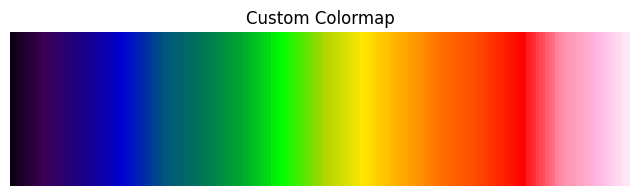

In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def create_colormap_from_image(image_path, crop_top=18, crop_bottom=17, reverse=True):
    """
    Creates a colormap from a PNG image of a colorbar.

    Parameters:
        image_path (str): Path to the PNG image representing the colormap.
        crop_top (int): Number of pixels to crop from the top of the image.
        crop_bottom (int): Number of pixels to crop from the bottom of the image.
        reverse (bool): If True, the colormap is reversed.

    Returns:
        ListedColormap: A matplotlib colormap created from the image.
    """
    # Load the image
    image = Image.open(image_path).convert("RGB")  # Ensure it's in RGB format
    image_array = np.array(image)

    # Crop the top and bottom to remove labels
    cropped_image = image_array[crop_top:-crop_bottom, :, :]  # Crop along the height

    # Extract a thin vertical layer (e.g., the center column)
    center_column = cropped_image[:, cropped_image.shape[1] // 2, :]  # (height, 3)

    # Reverse the colors if reverse=True
    if reverse:
        center_column = center_column[::-1]

    # Normalize the RGB values to range [0, 1] for matplotlib
    normalized_rgb = center_column / 255.0

    # Create the colormap
    custom_colormap = ListedColormap(normalized_rgb)

    return custom_colormap


def display_colormap(colormap):
    """
    Displays a sample visualization of a given colormap.

    Parameters:
        colormap (ListedColormap): The colormap to visualize.
    """
    gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Gradient from 0 to 1
    plt.figure(figsize=(8, 2))
    plt.imshow(gradient, aspect='auto', cmap=colormap)
    plt.axis('off')
    plt.title("Custom Colormap")
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Path to the colormap PNG
    colormap_image_path = "colormap.png"

    # Create the colormap
    try:
        custom_colormap = create_colormap_from_image(colormap_image_path)

        # Display the custom colormap
        display_colormap(custom_colormap)

    except Exception as e:
        print(f"Error: {e}")


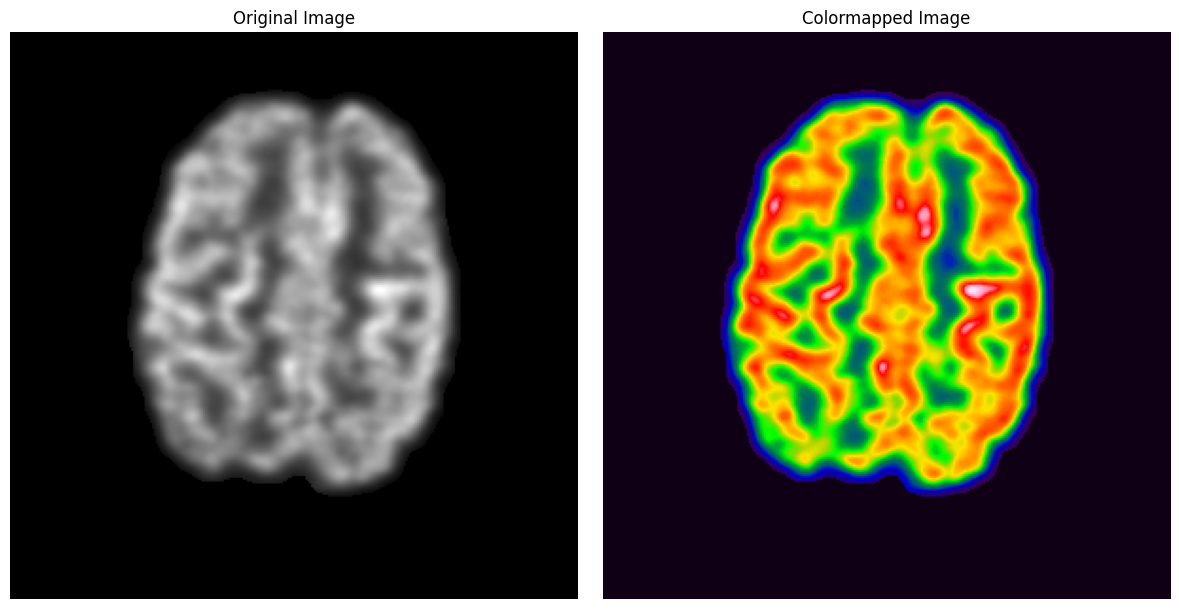

In [33]:
# Apply the colormap to a grayscale image
def apply_colormap(image_path, colormap):
    """
    Applies a colormap to a grayscale image.

    Parameters:
        image_path (str): Path to the grayscale image.
        colormap (ListedColormap): The colormap to apply.

    Returns:
        np.ndarray: The colormapped image as an RGB array.
    """
    # Load the image as a grayscale array
    image = Image.open(image_path).convert("L")  # Ensure grayscale
    image_array = np.array(image)

    # Normalize the grayscale values to [0, 1] for colormap application
    normalized_image = image_array / 255.0

    # Apply the colormap
    colormapped_image = colormap(normalized_image)

    # Convert the colormap result to RGB (remove alpha channel if present)
    colormapped_image_rgb = (colormapped_image[:, :, :3] * 255).astype(np.uint8)

    return image_array, colormapped_image_rgb

# Display original and colormapped images
def display_images(original_image, colormapped_image):
    """
    Displays the original grayscale image and the colormapped image side by side.

    Parameters:
        original_image (np.ndarray): The original grayscale image array.
        colormapped_image (np.ndarray): The colormapped image array.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the original grayscale image
    axes[0].imshow(original_image, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Display the colormapped image
    axes[1].imshow(colormapped_image)
    axes[1].set_title("Colormapped Image")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Path to the colorbar and grayscale image
    colormap_image_path = "colormap.png"
    image_path = r"D:\2_29JuneData\DL_Output_PNG\P01_Pg_DL_PET_MRI\PET_deskulled\P01_Pair12_PET_Depth29.24mm.png"
    # image_path = r"D:\2_29JuneData\DL_Output_PNG\P01_Pg_DL_PET_MRI\PET_deskulled\P01_Pair18_PET_Depth12.56mm.png"
    
    # Create the colormap from the colorbar
    try:
        custom_colormap = create_colormap_from_image(colormap_image_path)

        # Apply the colormap to the grayscale image
        original_image, colormapped_image = apply_colormap(image_path, custom_colormap)

        # Display the original and colormapped images
        display_images(original_image, colormapped_image)

    except Exception as e:
        print(f"Error: {e}")